In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
# Breast cancer data, with diagnosis as target variable
print(df.loc[:, 1].value_counts())

y = df.loc[:, 1].values
X = df.loc[:, 2:].values

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

1
B    357
M    212
Name: count, dtype: int64


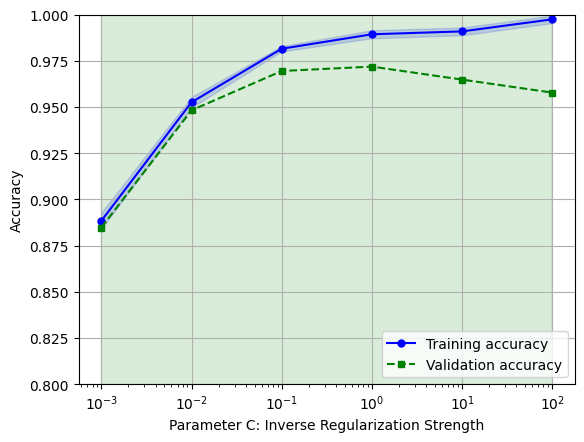

In [8]:
from sklearn.model_selection import validation_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', max_iter=10000))
param_range = np.logspace(-3, 2, 6)

train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        param_name='logisticregression__C', # Lets scikit learn know which parameter to scan over
                                                        param_range=param_range,
                                                        cv=10)

train_mean = np.mean(train_scores, axis=1) #average across estimators (by column)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C: Inverse Regularization Strength')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

For small values of C (large regularization cost), there is a bit more bias, since coefficients are forced towards 0. However, at larger values, there is almost no regularization - this encourages overfitting, and produces higher variance (lower generalizability). There seems to be a sweet spot somewhere between 0.01 and 0.1 ($\lambda_{reg} = C^{-1} \in [10, 100]$).

This can also be used to tune other hyperparameters for other models.

Let's do the same for an $L_1$ reglarizer. Bear in mind that we need to use a solver that supports it.

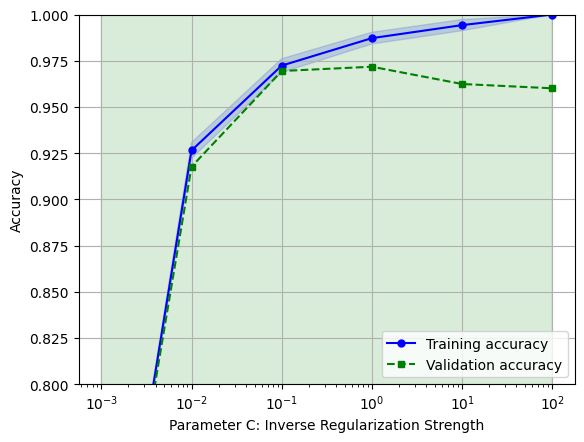

In [11]:
from sklearn.model_selection import validation_curve

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l1', max_iter=10000, solver='liblinear'))
param_range = np.logspace(-3, 2, 6)

train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                                        X=X_train,
                                                        y=y_train,
                                                        param_name='logisticregression__C', # Lets scikit learn know which parameter to scan over
                                                        param_range=param_range,
                                                        cv=10)

train_mean = np.mean(train_scores, axis=1) #average across estimators (by column)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C: Inverse Regularization Strength')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()